# implement PCA

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

In [21]:
#csv with decimal & null filed
df = pd.read_csv('processed_df.csv')

In [22]:
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
df['Country'] = labelencoder.fit_transform(df['Country'])
df['Region'] = labelencoder.fit_transform(df['Region'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    int32  
 1   Region                              227 non-null    int32  
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       227 non-null    float64
 7   Infant mortality (per 1000 births)  227 non-null    float64
 8   GDP ($ per capita)                  227 non-null    float64
 9   Literacy (%)                        227 non-null    float64
 10  Phones (per 1000)                   227 non-null    float64
 11  Arable (%)                          227 non-n

In [23]:
def PCA(x):
    #subtract from mean and divide by standard deviation
    x_standarized = (x - np.mean(x, axis=0)) / np.std(x, axis=0)
    print('x_standarized mean: ', np.mean(x_standarized))
    print('x_standarized standard deviation: ', np.std(x_standarized))
    #get covariance matrix
    cov_matrix = np.cov(x_standarized.T)
    print('cov matrix shape', cov_matrix.shape)
    #eigen values, eigne vectors
    eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)
    
    return eigen_values, eigen_vectors

In [24]:
x = df.values
eigen_values, eigen_vectors = PCA(x)

x_standarized mean:  -4.1865678814058764e-17
x_standarized standard deviation:  1.0
cov matrix shape (20, 20)


In [25]:
eigen_values

array([5.41057892e+00, 2.51240914e+00, 1.97154237e+00, 1.71240811e+00,
       1.34582957e+00, 1.11649535e+00, 1.06774723e+00, 9.42470017e-01,
       8.17921292e-01, 5.99062861e-01, 5.48894178e-01, 5.08025579e-01,
       4.57136275e-01, 3.66685525e-01, 3.13156314e-01, 1.84899840e-01,
       1.38272528e-01, 6.86310227e-02, 6.19705895e-03, 1.32398471e-04])

In [26]:
#normalize eigen values
eigen_values = eigen_values / np.sum(eigen_values)
eigen_values

array([2.69337188e-01, 1.25067063e-01, 9.81428581e-02, 8.52432230e-02,
       6.69950403e-02, 5.55788433e-02, 5.31521747e-02, 4.69159084e-02,
       4.07159057e-02, 2.98211909e-02, 2.73238071e-02, 2.52893790e-02,
       2.27561230e-02, 1.82535085e-02, 1.55888386e-02, 9.20426514e-03,
       6.88316988e-03, 3.41643417e-03, 3.08487956e-04, 6.59076088e-06])

In [27]:
eigen_values.cumsum()

array([0.26933719, 0.39440425, 0.49254711, 0.57779033, 0.64478537,
       0.70036422, 0.75351639, 0.8004323 , 0.84114821, 0.8709694 ,
       0.8982932 , 0.92358258, 0.94633871, 0.96459221, 0.98018105,
       0.98938532, 0.99626849, 0.99968492, 0.99999341, 1.        ])

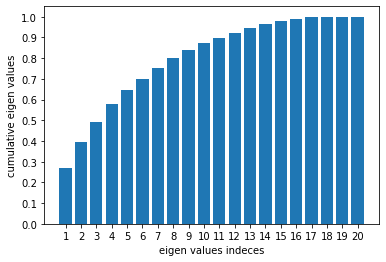

In [28]:
#Visualize eigen values as cumulative to choose 95% of variance
x_values = range(1, len(eigen_values)+1)
plt.bar(x_values, eigen_values.cumsum())
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
plt.xlabel('eigen values indeces')
plt.ylabel('cumulative eigen values')
plt.show()

## From graph select 12 components

In [29]:
eigen_vectors.shape

(20, 20)

In [30]:
# transform the data
transformed_x = np.dot(x, eigen_vectors[:,:12])
transformed_x.shape

(227, 12)

In [31]:
transformed_x

array([[   287547.81581914,  -1108696.27529471, -13364858.35298362, ...,
         -2028129.80850959,  -2192557.03400759,  16044792.1358551 ],
       [    31902.51133044,   -134000.5062699 ,  -1524440.95479167, ...,
          -234578.73590747,   -263323.52868638,   1872178.22914142],
       [   292799.35046704,   -913359.50487358, -14782758.11934518, ...,
         -2130131.57921082,  -1940741.94444454,  16216266.45999477],
       ...,
       [   198030.31203822,   -753466.65394881,  -9262396.47048051, ...,
         -1400195.6781539 ,  -1496497.66948182,  11046932.21793752],
       [   103221.16986646,   -331479.22188054,  -5134828.95718677, ...,
          -744932.28880465,   -695828.37913551,   5701282.63222302],
       [   111913.33454951,   -415624.22054627,  -5314710.6077456 , ...,
          -797519.12717441,   -833241.73575628,   6258258.89051679]])

In [32]:
transformed_x_df = pd.DataFrame(transformed_x)
transformed_x_df.to_csv('transformed_x_df.csv', index=False)